
# Algoritmo TOMATO

El concepto de agrupación en clústeres a partir del análisis topológico de datos, [algoritmo ToMATo](https://geometrica.saclay.inria.fr/team/Steve.Oudot/papers/cgos-pbc-09/cgos-pbcrm-11.pdf), hace referencia a una herramienta novedosa de clustering basada en una herramienta conocida como la Persistencia. Este algoritmo tiene dos puntos fuertes
- Brinda una forma de saber cuántos clústeres parecen tener sus datos;

- Brinda una forma de recopilar estos datos en conjuntos distintos para agruparlos.

Utilizamos el paquete gudhi para implementar este cluster.

In [3]:
#!conda install -c conda-forge gudhi -y

***Tomado de la documentación***

Este algoritmo utiliza un estimador de densidad y un gráfico de vecindad, comienza con una fase de búsqueda de modo (escalada ingenua) para construir grupos iniciales y termina fusionando grupos en función de su prominencia.

La fase de fusión depende de un parámetro, que es la prominencia mínima que necesita un clúster para evitar fusionarse en otro clúster más grande. Este parámetro determina el número de clústeres y, por conveniencia, le permitimos elegir en su lugar el número de clústeres. Disminuir el umbral de prominencia define una jerarquía de grupos: si 2 puntos están en grupos separados cuando tenemos k grupos, todavía están en grupos diferentes para k + 1 grupos.

Como subproducto, producimos el diagrama de persistencia del árbol de fusión de los clústeres iniciales. Esta es una herramienta gráfica conveniente para ayudar a decidir cuántos clústeres queremos.

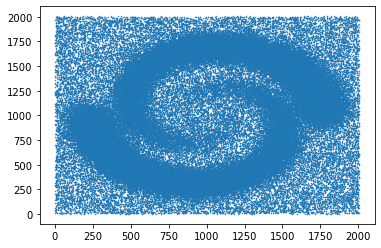

In [14]:
import gudhi
import numpy as np
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/GUDHI/gudhi-devel/master/data/points/spiral_2d.csv',header=None,sep=' ')

import matplotlib.pyplot as plt
plt.scatter(data[0],data[1],marker='.',s=1)
plt.show()

In [15]:
data=data.values

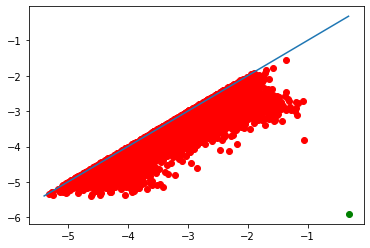

In [17]:
from gudhi.clustering.tomato import Tomato
t = Tomato()
t.fit(data)
t.plot_diagram()

Como se puede ver en t.n_clusters_ , el algoritmo encontró 6316 agrupaciones iniciales. El diagrama muestra su prominencia como su distancia a la diagonal. Siempre hay un punto infinitamente lejano: hay al menos un grupo. Entre los otros, un punto parece significativamente más alejado de la diagonal que los otros, lo que indica que dividir los puntos en 2 grupos puede ser una idea sensata.

In [19]:
t.n_clusters_

6316

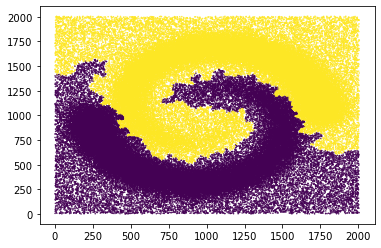

In [20]:
t.n_clusters_=2
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.labels_)
plt.show()

Por supuesto, este es solo el resultado de un conjunto de parámetros. Podemos pedir un estimador de densidad diferente y un gráfico de vecindad diferente calculado con diferentes parámetros.



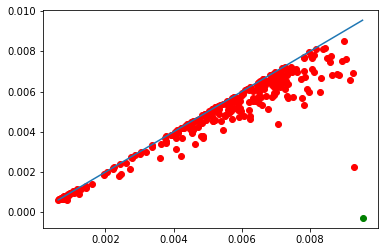

In [21]:
t = Tomato(density_type='DTM', k=100)
t.fit(data)
t.plot_diagram()

Aclara el número de grupos y cambia un poco la forma de los grupos.

Un vistazo rápido a la estimación de densidad correspondiente

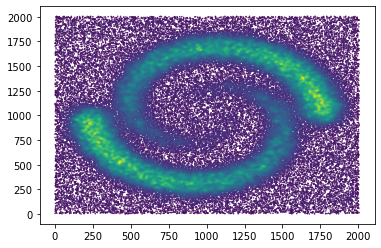

In [22]:
plt.scatter(data[:,0],data[:,1],marker='.',s=1,c=t.weights_)
plt.show()

El código proporciona algunos estimadores de densidad y construcciones de gráficos para mayor comodidad cuando se experimenta por primera vez, pero en realidad se espera que los usuarios avanzados proporcionen su propio gráfico y estimaciones de densidad en lugar de coordenadas de puntos.

Dado que el algoritmo básicamente calcula cuencas de atracción, también se recomienda su uso en funciones que no representan densidades en absoluto.

In [24]:
import scipy
scipy.__version__

'1.6.2'

In [ ]:
conda install